# Tasca del test d'hipòtesis

**Descripció**  
Aprèn a realitzar test d'hipòtesis amb Python.

In [1]:
import pandas as pd
import numpy as np
import random
import statistics as st
import scipy 

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.simplefilter('ignore')

In [2]:
PATH = '../data-sources/'

dtypes = {'position':'category', 'team':'category'}
mlb = pd.read_csv(PATH+'mlbBat10.txt', sep='\t', dtype=dtypes)


In [3]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [12]:
np.corrcoef(mlb.AVG, (mlb.H/mlb.AB).fillna(0))

array([[1.        , 0.99999882],
       [0.99999882, 1.        ]])

In [24]:
mlb.H.value_counts().sort_index(ascending=False)

214      1
200      1
197      1
189      2
188      1
      ... 
4       23
3       29
2       32
1       65
0      407
Name: H, Length: 176, dtype: int64

## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [6]:
mlb.position.value_counts()

P     544
OF    226
C     113
2B     72
3B     71
SS     71
1B     69
DH     25
-       8
Name: position, dtype: int64

Seleccionem el camp `AVG` i definim la hipòtesi:

- $H_0$: $ \mu_p - \mu_o \ge 0$ els jugadors a la posició Pitcher que han batejat 10 cops o més tenen el mateix, o més, percentatge de bateig que la resta que han batejat 10 cops o més

- $H_1$: $ \mu_p - \mu_o < 0$ els Pitchers tenen pitjor percentatge de bateig que la resta (amb bateig de 10 cops o més)

Per això, mirem primer la distribució

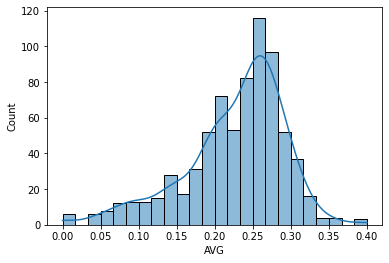

In [35]:
filtre = mlb.AB >= 10
sns.histplot(mlb[filtre].AVG, kde=True)
dades = mlb[filtre].copy()

Observem que la corva no es gaussiana, haurem de vigilar amb la mitja.

In [40]:
pitcher = dades.position == 'P'
print(f"""Other's mean{dades[~pitcher].AVG.mean()}\t std: {dades[~pitcher].AVG.std()}
Pitcher mean: {dades[pitcher].AVG.mean()}\t std: {dades[pitcher].AVG.std()}""")

Other's mean0.24235967741935485	 std: 0.049459710793920225
Pitcher mean: 0.1423333333333333	 std: 0.08015061253449765


In [113]:
scipy.stats.ttest_ind( dades[~pitcher].AVG.sample(117), dades[pitcher].AVG,  alternative='greater',)

Ttest_indResult(statistic=11.993606462714098, pvalue=2.082974092721935e-26)

In [50]:
dades[~pitcher].AVG.shape, dades[pitcher].AVG.shape

((620,), (117,))

<AxesSubplot:xlabel='AVG', ylabel='Density'>

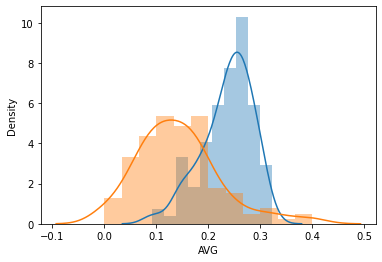

In [51]:
sns.distplot(dades[~pitcher].AVG.sample(117))
sns.distplot(dades[pitcher].AVG)



In [84]:

nopitch_means, pitch_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = dades.sample(200, replace = True)
    pitch_mean = bootsamp[bootsamp['position'] == 'P']['AVG'].mean()
    nopitch_mean = bootsamp[bootsamp['position'] != 'P']['AVG'].mean()
    # append the info 
    pitch_means.append(pitch_mean)
    nopitch_means.append(nopitch_mean)
    diffs.append(pitch_mean - nopitch_mean)   
    

In [85]:
np.std(pitch_means), np.std(nopitch_means), np.std(diffs)

(0.014505399598728898, 0.003725438024737859, 0.015068261828310253)

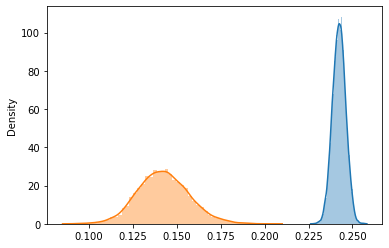

In [106]:
sns.distplot(nopitch_means, );
sns.distplot(pitch_means, );

<AxesSubplot:ylabel='Density'>

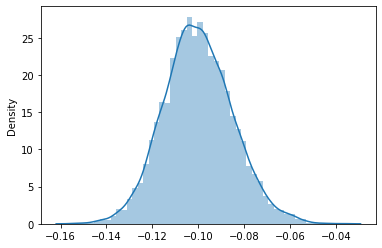

In [107]:
sns.distplot(diffs)

<AxesSubplot:ylabel='Density'>

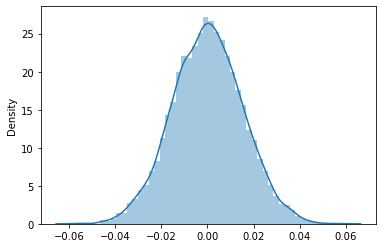

In [109]:
null_vars = np.random.normal(loc= 0, scale=np.std(diffs), size=10000)
sns.distplot(null_vars)

## Nivell 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

## Nivell 3
### Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

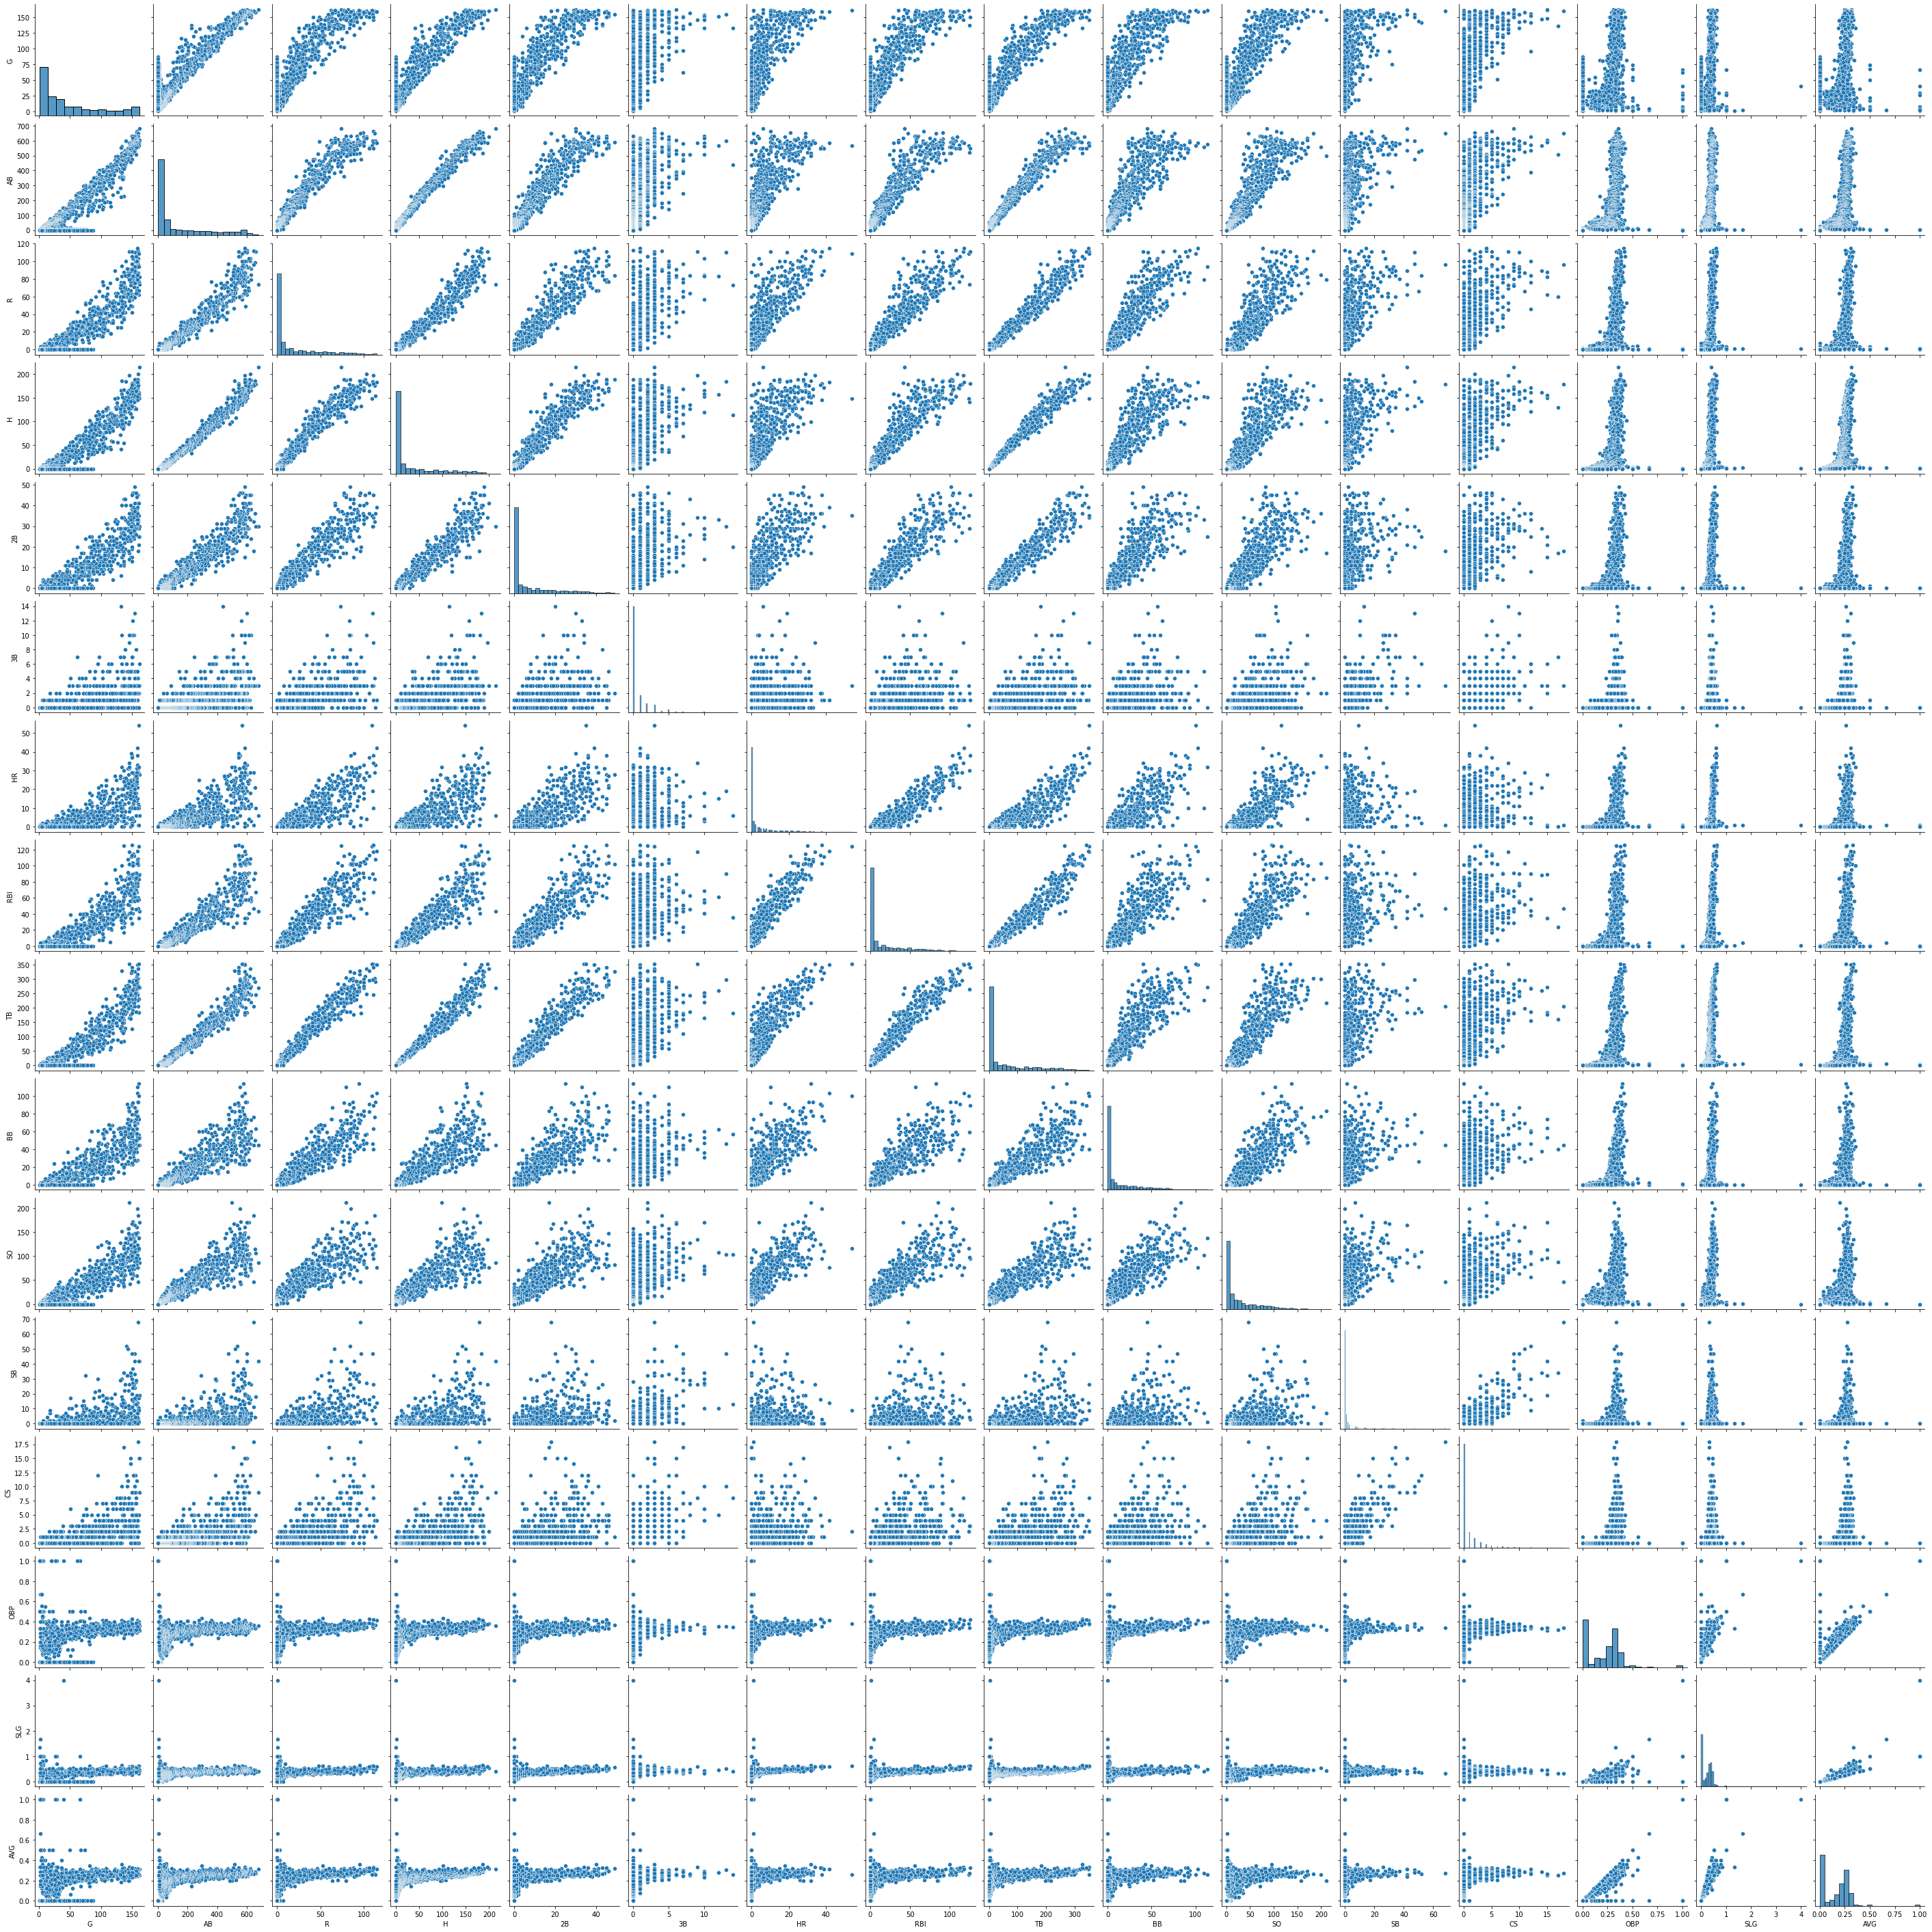

In [9]:
sns.pairplot(mlb)